In [2]:
pip install causal-learn


In [3]:
pip show causal-learn

Name: causal-learnNote: you may need to restart the kernel to use updated packages.

Version: 0.1.3.8
Summary: causal-learn Python Package
Home-page: https://github.com/py-why/causal-learn
Author: 
Author-email: 
License: 
Location: c:\users\acer\anaconda3\lib\site-packages
Requires: graphviz, matplotlib, networkx, numpy, pandas, pydot, scikit-learn, scipy, statsmodels, tqdm
Required-by: 


In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/ACER/Documents/TCDF-master/TCDF-master/data/Finance/manyinputs_returns30007000_header.csv')
print(df.info())
print(df.shape)
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S0      4000 non-null   float64
 1   S1      4000 non-null   float64
 2   S2      4000 non-null   float64
 3   S3      4000 non-null   float64
 4   S4      4000 non-null   float64
 5   S5      4000 non-null   float64
 6   S6      4000 non-null   float64
 7   S7      4000 non-null   float64
 8   S8      4000 non-null   float64
 9   S9      4000 non-null   float64
 10  S10     4000 non-null   float64
 11  S11     4000 non-null   float64
 12  S12     4000 non-null   float64
 13  S13     4000 non-null   float64
 14  S14     4000 non-null   float64
 15  S15     4000 non-null   float64
 16  S16     4000 non-null   float64
 17  S17     4000 non-null   float64
 18  S18     4000 non-null   float64
 19  S19     4000 non-null   float64
 20  S20     4000 non-null   float64
 21  S21     4000 non-null   float64
 22  

In [5]:
from sklearn.model_selection import train_test_split
from causallearn.search.ConstraintBased.FCI import fci

data_array = df.values
train, test = train_test_split(data_array, test_size=0.2, random_state=42)

pc_train,edges_train = fci(train)
pc_test,edges_test = fci(test)

  0%|          | 0/25 [00:00<?, ?it/s]

X3 --> X1
X1 --> X4
X1 --> X5
X1 --> X6
X8 --> X1
X9 --> X1
X1 --> X11
X2 --> X3
X4 --> X2
X2 --> X8
X2 --> X9
X2 --> X10
X2 --> X11
X2 --> X12
X3 --> X4
X5 --> X3
X7 --> X3
X3 --> X8
X3 --> X9
X12 --> X3
X4 --> X5
X4 --> X7
X8 --> X4
X4 --> X9
X10 --> X4
X13 --> X4
X8 --> X5
X9 --> X5
X10 --> X5
X6 --> X7
X6 --> X8
X7 --> X12
X10 --> X8
X8 --> X11
X8 --> X13
X8 --> X14
X10 --> X9
X12 --> X9
X13 --> X9
X9 --> X14
X15 --> X9
X9 --> X18
X10 --> X13
X10 --> X14
X10 --> X15
X11 --> X13
X11 --> X16
X11 --> X17
X12 --> X13
X12 --> X14
X12 --> X16
X12 --> X17
X12 --> X19
X13 --> X14
X13 --> X16
X13 --> X19
X15 --> X14
X18 --> X14
X14 --> X19
X15 --> X20
X18 --> X17
X17 --> X22
X24 --> X17
X18 --> X20
X18 --> X25
X19 --> X23
X19 --> X24
X19 --> X25
X21 --> X22
X21 --> X23
X22 --> X23
X24 --> X22
X22 --> X25
X24 --> X23
X23 --> X25
X24 --> X25


  0%|          | 0/25 [00:00<?, ?it/s]

X1 --> X3
X1 --> X5
X1 --> X6
X1 --> X9
X1 --> X12
X2 --> X3
X2 --> X4
X2 --> X7
X2 --> X8
X3 --> X5
X3 --> X8
X3 --> X15
X4 --> X5
X7 --> X4
X8 --> X4
X4 --> X9
X4 --> X10
X8 --> X5
X5 --> X9
X5 --> X10
X6 --> X7
X13 --> X6
X7 --> X12
X8 --> X9
X8 --> X10
X8 --> X12
X8 --> X14
X9 --> X10
X9 --> X13
X9 --> X14
X10 --> X14
X10 --> X15
X11 --> X16
X11 --> X21
X12 --> X16
X12 --> X17
X12 --> X19
X14 --> X13
X15 --> X13
X13 --> X16
X13 --> X17
X13 --> X18
X19 --> X13
X13 --> X20
X15 --> X14
X14 --> X18
X14 --> X19
X15 --> X20
X24 --> X15
X15 --> X25
X17 --> X16
X18 --> X16
X16 --> X21
X17 --> X18
X17 --> X21
X24 --> X17
X19 --> X18
X20 --> X18
X19 --> X22
X23 --> X19
X24 --> X20
X21 --> X22
X21 --> X23
X22 --> X24
X22 --> X25
X23 --> X24
X23 --> X25
X24 --> X25


In [45]:
true_adj = pc_train
inferred_adj = pc_test

In [46]:
from causallearn.graph.ArrowConfusion import ArrowConfusion
from causallearn.graph.AdjacencyConfusion import AdjacencyConfusion
from causallearn.graph.SHD import SHD

# For arrows
arrow = ArrowConfusion(true_adj, inferred_adj)

arrowsTp = arrow.get_arrows_tp()
arrowsFp = arrow.get_arrows_fp()
arrowsFn = arrow.get_arrows_fn()
arrowsTn = arrow.get_arrows_tn()

arrowPrec = arrow.get_arrows_precision()
arrowRec = arrow.get_arrows_recall()
# For adjacency matrices
adj = AdjacencyConfusion(true_adj, inferred_adj)

adjTp = adj.get_adj_tp()
adjFp = adj.get_adj_fp()
adjFn = adj.get_adj_fn()
adjTn = adj.get_adj_tn()
adjPrec = adj.get_adj_precision()
adjRec = adj.get_adj_recall()




In [47]:
def calculate_mcc(arrowsTp, arrowsTn, arrowsFp, arrowsFn):
    numerator = (arrowsTp * arrowsTn) - (arrowsFp * arrowsFn)
    denominator = ((arrowsTp + arrowsFp) * (arrowsTp + arrowsFn) * (arrowsTn + arrowsFp) * (arrowsTn + arrowsFn)) ** 0.5
    if denominator == 0:
        return 0
    return numerator / denominator
    
def calculate_fdr(arrowsTp, arrowsFp):
    """Menghitung False Discovery Rate (FDR)."""
    if (arrowsTp + arrowsFp) == 0:
        return 0  # Untuk menghindari pembagian dengan nol
    return arrowsFp / (arrowsTp + arrowsFp)

def calculate_sid(arrowsTp, arrowsTn, arrowsFp, arrowsFn):
    """Menghitung Structural Independence Distance (SID)."""
    return arrowsFp + arrowsFn

In [48]:
shd = SHD(true_adj, inferred_adj).get_shd()
mcc = calculate_mcc(arrowsTp, arrowsTn, arrowsFp, arrowsFn)
fdr = calculate_fdr(arrowsTp, arrowsFp)
sid = calculate_sid(arrowsTp, arrowsTn, arrowsFp, arrowsFn)

#print(f"Arrows True Positive: {arrowsTp}, False Positive: {arrowsFp}, False Negative: {arrowsFn}, True Negative: {arrowsTn}")
#print(f"Arrow Precision: {arrowPrec}, Recall: {arrowRec}")
#print(f"Adjacency True Positive: {adjTp}, False Positive: {adjFp}, False Negative: {adjFn}, True Negative: {adjTn}")
#print(f"Adjacency Precision: {adjPrec}, Recall: {adjRec}")
print(f"SHD: {shd}")
print(f"SID: {sid}")
print(f"FDR: {fdr}")
print(f"MCC: {mcc}")


SHD: 79
SID: 109.0
FDR: 0.3522727272727273
MCC: 0.42469658686164585


In [29]:
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(pc_test)
pdy.write_png('simple_test67.png')

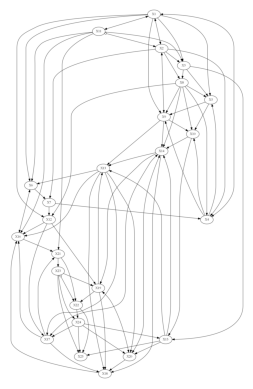

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'simple_test67.png'  
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()